In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_style(rc=plt.rcParams)

In [2]:
from src.parameters import ANIMALS
from loren_frank_data_processing import make_epochs_dataframe
from loren_frank_data_processing import make_neuron_dataframe
from loren_frank_data_processing import get_position_dataframe
from loren_frank_data_processing import get_spikes_dataframe

In [3]:
epoch_info = make_epochs_dataframe(ANIMALS)

In [7]:
epoch_key = ('HPa', 3, 2) # animal, day, epoch
position_info = get_position_dataframe(epoch_key, ANIMALS)

Failed to load file: /home/trevortknguyen/repos/tn_decoding/src/../Raw-Data/HPa_direct/HPaDIO03.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /home/trevortknguyen/repos/tn_decoding/src/../Raw-Data/HPa_direct/HPaDIO03.mat
No DIO file found, inferring correct inbound/outbound from task rules


In [8]:
position_info['time_sec'] = position_info.index / np.timedelta64(1, 's')

In [10]:
neuron_info = make_neuron_dataframe(ANIMALS)
neuron_info = neuron_info.xs(epoch_key, drop_level=False)

In [22]:
def get_position_info_indices_at_spikes(spike_times_sec, position_info):
    '''
    spike_times_sec must be the times in seconds
    position_info must be modified to have a 'time_sec' column with corresponding units to spike_times_sec
    '''
    time_indices = np.empty((spike_times_sec.shape[0]), dtype='int')

    spike_time_index = 0

    for i, spike_time in enumerate(spike_times_sec):
        for index in range(spike_time_index, position_info['time_sec'].shape[0]):
            prev_index = max(0, index-1)
            prev_pos_time = position_info['time_sec'][prev_index]
            pos_time = position_info['time_sec'][index]
            # if we have gone too far
            if pos_time > spike_time:
                spike_time_index = prev_index
                break
        # time_ind (where to index into positions table)
        time_indices[i] = spike_time_index
    return time_indices

In [43]:
neuron_info.index.shape[0]

34

In [77]:
neuron_idx = 0
neuron_area = neuron_info.iloc[neuron_idx]['area']
neuron_id = neuron_info.iloc[neuron_idx]['neuron_id']

In [76]:
spike_times = get_spikes_dataframe(neuron_info.index[neuron_idx], ANIMALS)

In [51]:
spike_times_sec = spike_times.index / np.timedelta64(1, 's')

In [52]:
time_indices = get_position_info_indices_at_spikes(spike_times_sec, position_info)
spike_position_info = position_info.iloc[time_indices]

In [101]:
spike_position_info

,x_position,y_position,head_direction,speed,linear_distance,projected_x_position,projected_y_position,track_segment_id,arm_name,labeled_segments,from_well,to_well,task,is_correct,turn,linear_position,linear_velocity,linear_speed,time_sec
time,,,,,,,,,,,,,,,,,,,
0 days 00:45:00.888100,125.239754,18.535000,3.088030,4.158017,102.329522,125.281856,22.715299,2.0,Right Arm,2,Right,Center,Inbound,True,Right,117.329522,-3.550447,3.550447,2700.8881
0 days 00:45:02.022800,122.749748,21.893589,2.616846,2.263485,99.805819,122.758280,22.740715,2.0,Right Arm,2,Right,Center,Inbound,True,Right,114.805819,-1.549092,1.549092,2702.0228
0 days 00:45:02.022800,122.749748,21.893589,2.616846,2.263485,99.805819,122.758280,22.740715,2.0,Right Arm,2,Right,Center,Inbound,True,Right,114.805819,-1.549092,1.549092,2702.0228
0 days 00:45:02.156100,122.727109,21.794835,2.636535,1.826063,99.784175,122.736638,22.740933,2.0,Right Arm,2,Right,Center,Inbound,True,Right,114.784175,-1.266356,1.266356,2702.1561
0 days 00:45:02.189500,122.762090,21.741459,2.644933,1.719913,99.819692,122.772152,22.740576,2.0,Right Arm,2,Right,Center,Inbound,True,Right,114.819692,-1.196151,1.196151,2702.1895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 01:05:37.882800,102.543498,100.511004,0.340595,0.298774,0.000000,97.373272,98.771930,0.0,Center Arm,138,NaN,NaN,NaN,False,NaN,0.000000,0.000000,0.000000,3937.8828
0 days 01:05:39.184100,103.350000,100.100000,0.353878,0.279890,0.000000,97.373272,98.771930,0.0,Center Arm,138,NaN,NaN,NaN,False,NaN,0.000000,0.000000,0.000000,3939.1841
0 days 01:05:39.184100,103.350000,100.100000,0.353878,0.279890,0.000000,97.373272,98.771930,0.0,Center Arm,138,NaN,NaN,NaN,False,NaN,0.000000,0.000000,0.000000,3939.1841


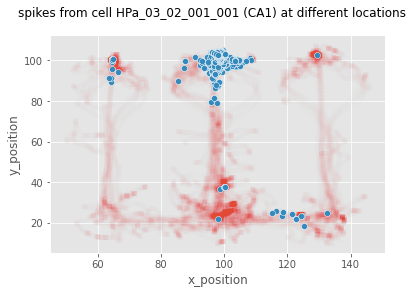

In [99]:
fig, ax = plt.subplots()
sns.scatterplot(x='x_position', y='y_position',
                alpha=0.005,
               data=position_info,
               ax=ax)
sns.scatterplot(x='x_position', y='y_position',
               data=spike_position_info,
               ax=ax)
fig.suptitle(f'spikes from cell {neuron_id} ({neuron_area}) at different locations')
None

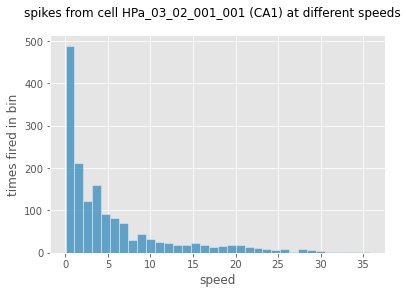

In [98]:
fig, ax = plt.subplots()
sns.histplot(x='speed',
               data=spike_position_info,
            ax=ax)
ax.set_ylabel('times fired in bin')
fig.suptitle(f'spikes from cell {neuron_id} ({neuron_area}) at different speeds')
None

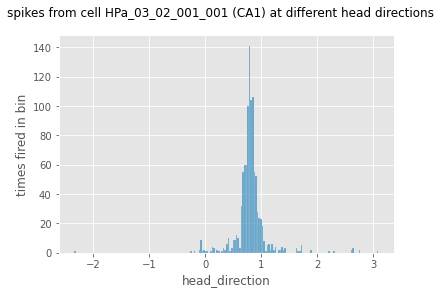

In [103]:
fig, ax = plt.subplots()
sns.histplot(x='head_direction',
               data=spike_position_info,
            ax=ax)
ax.set_ylabel('times fired in bin')
fig.suptitle(f'spikes from cell {neuron_id} ({neuron_area}) at different head directions')
None

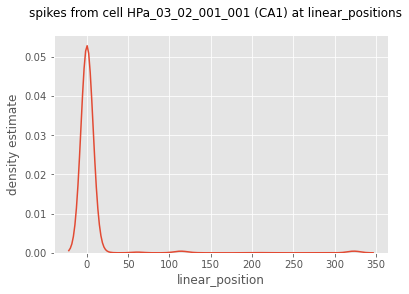

In [106]:
fig, ax = plt.subplots()
sns.kdeplot(x='linear_position',
               data=spike_position_info,
            ax=ax)
ax.set_ylabel('density estimate')
fig.suptitle(f'spikes from cell {neuron_id} ({neuron_area}) at linear_positions')
None

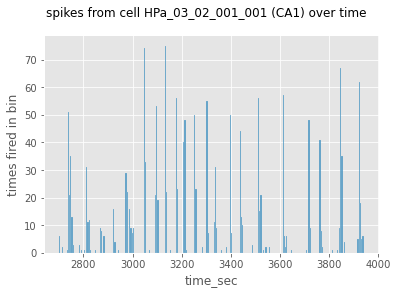

In [100]:
fig, ax = plt.subplots()
sns.histplot(x='time_sec',
               data=spike_position_info,
             binwidth=5,
            ax=ax) 
ax.set_ylabel('times fired in bin')
fig.suptitle(f'spikes from cell {neuron_id} ({neuron_area}) over time')
None

In [111]:
spikes_and_positions = np.empty((spike_position_info['linear_position'].shape[0], 2))

In [117]:
spikes_and_positions[:,0] = neuron_idx
spikes_and_positions[:,1] = spike_position_info['linear_position'].values

In [ ]:
positions_at_spikes = get_position_at_spikes(spike_times_sec, position_info)